In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
from keras.models import Model

In [3]:
from keras.models import load_model

In [4]:
#provide directory for mnist_cnn_99.h5 file
model = load_model('mnist_cnn_99.h5')

In [5]:
def process_image(img):
    print("Original Image")
    plt.imshow(img)
    plt.show()
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    print("Grayscale")
    plt.imshow(img,cmap='gray')
    plt.show()
    proc = cv2.GaussianBlur(img.copy(), (9, 9), 0)
    print("Blurred")
    plt.imshow(proc,cmap='gray')
    plt.show()
    proc = cv2.adaptiveThreshold(proc, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    print("cleaned")
    plt.imshow(proc,cmap='gray')
    plt.show()
    proc = ~proc
    print("inverted")
    plt.imshow(proc,cmap='gray')
    plt.show()
    proc = cv2.resize(proc,(28,28))
    print("resized")
    plt.imshow(proc,cmap='gray')
    plt.show()
    img_array = proc.reshape(1, 28, 28, 1)
    return img_array

In [6]:
#read image stored on device by providing complete address of image
image = cv2.imread('7.jpg')

Original Image


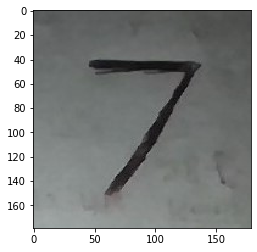

Grayscale


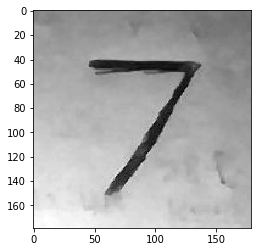

Blurred


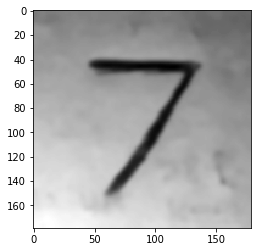

cleaned


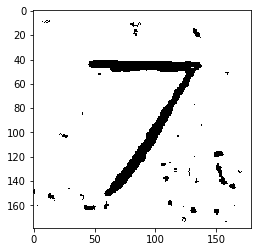

inverted


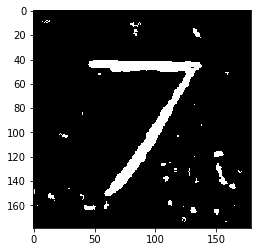

resized


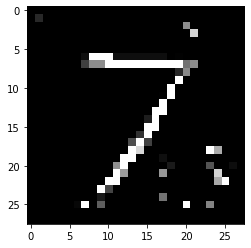

Predicted Number is 7


In [7]:
image_array = process_image(image)
pred = model.predict(image_array)
print("Predicted Number is",pred.argmax())